# Monte Carlo modelling of zircon Ce/Nd 

This Jupyter notebook is a supplementary file to the paper "Controls on the magnitude of Ce anomalies in zircon" by M. Loader, C. Nathwani, J. Wilkinson and R. Armstrong.

## Import libraries and define functions

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import random as rd
from pylab import rcParams

# Function to calculate the Ce valence ratio using Smythe and Brenan 2015
def calc_Ce_valence_ratio(delFMQ, T, NBOT, xH2O):
    logfO2 = (-24441.9/T) + 8.29 + delFMQ
    lnfO2 = np.log(10**logfO2)
    Ce_valence_ratio = np.exp((0.25*lnfO2)+(13136/T)-(2.064*NBOT)-(8.878*xH2O)-8.955)
    return Ce_valence_ratio

# Use equation in Fig. 7 to calculate DCe4
def calc_DCe4(T):
    DCe4 = np.exp(10245*(1/T)-4.3215)
    return DCe4

# Calculate total DCe equation 
def calc_DCe(Ce_valence_ratio, DCe4, DCe3):
    DCe = ((Ce_valence_ratio*DCe4)+DCe3)/(Ce_valence_ratio+1)
    return(DCe)

# D = mineral/melt:
def calc_Ce_zircon(DCe, melt_Ce):
    Ce_zircon = DCe*melt_Ce
    return Ce_zircon

# Calculate NBO/T using relationship of experimental calibration (Fig 8)
def calc_NBOT(T):
    NBOT = np.exp(-13328*(1/T)+9.1629)
    return NBOT


## Set parameters for Monte Carlo simulation

Initialisation of the model by setting random distribution of parameters within realistic intervals.


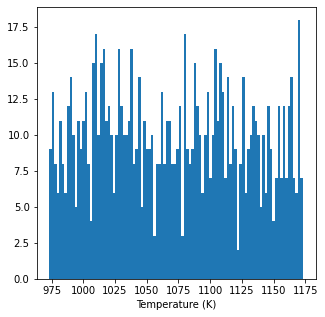

In [42]:
#fO2
delFMQ_min, delFMQ_max, delFMQ_mean = 0, 3, 1.5
range_delFMQ = np.random.uniform(delFMQ_min, delFMQ_max, 1000)
#Temperature
T_min, T_max, T_mean = 700,900,800
T_min, T_max, T_mean = T_min + 273.15, T_max + 273.15, T_mean + 273.15
range_T = np.random.uniform(T_min, T_max, 1000)
#xH2O - fixed
xH2O_min, xH2O_max, xH2O_mean = 0.1866, 0.1866, 0.1866
range_xH2O = np.random.uniform(xH2O_min, xH2O_max,1000)
# fixed DCe3+
DCe3 = 0.01
# melt Ce/Nd
meltCeNd_min, meltCeNd_max, meltCeNd_mean = 2,5,3.5
range_meltCeNd = np.random.uniform(meltCeNd_min, meltCeNd_max,1000)
range_DNd = np.random.uniform(0.092, 0.092, 1000) # Average from Marshall, Sano, Claiborne, Colombini, Bachmann, Padilla and Gualda

# To illustrate the "random uniform" distribution of parameters
plt.hist(range_T, bins = 100)
plt.xlabel('Temperature (K)')
plt.show()


Now that the parameters are intialised, we will run 100,000 random simulations of zircon crystallisation from melts under random conditions. 

In [43]:
# Monte Carlo simulation

n = 100000 # end
run = 0 # start
# Define empty lists to be filled with results
all_results_zirconCeNd = []
all_results_zirconSm = []
all_results_delFMQ = []
all_results_T = []
all_results_NBOT = []
all_results_xH2O = []
all_results_Ce_valence_ratio = []
all_results_DCe4 = []
all_results_DCe = []
all_results_Ce_melts = []
all_results_Nd_melts = []
all_results_Sm_melts = []
all_results_meltCeNd = []
while run <= n:
    rd_T = rd.choice(range_T)
    rd_delFMQ = rd.choice(range_delFMQ)
    rd_NBOT = calc_NBOT(rd_T)
    rd_xH2O = rd.choice(range_xH2O)
    rd_meltCeNd = rd.choice(range_meltCeNd)
    rd_Ce_valence_ratio = calc_Ce_valence_ratio(rd_delFMQ, rd_T, rd_NBOT, rd_xH2O)
    rd_DCe4 = calc_DCe4(rd_T)
    rd_DCe = calc_DCe(rd_Ce_valence_ratio, rd_DCe4, DCe3)
    D_index = rd.randrange(len(range_DNd))
    rd_DNd = range_DNd[D_index]
    zircon_CeNd = (rd_DCe*rd_meltCeNd)/(rd_DNd*1)
    all_results_zirconCeNd.append(zircon_CeNd)
    all_results_Ce_valence_ratio.append(rd_Ce_valence_ratio)
    all_results_T.append(rd_T)
    all_results_delFMQ.append(rd_delFMQ)
    all_results_NBOT.append(rd_NBOT)
    all_results_xH2O.append(rd_xH2O)
    all_results_DCe.append(rd_DCe)
    all_results_DCe4.append(rd_DCe4)
    all_results_meltCeNd.append(rd_meltCeNd)
    run = run + 1 # Move onto the next simulation
    

Now, we will cast these results into a pandas dataframe and plot the results

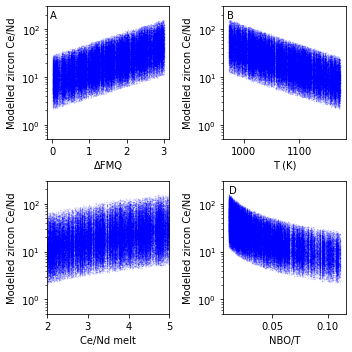

In [46]:
all_model_results = pd.DataFrame({'delFMQ': all_results_delFMQ, 'Ce4+/3+':all_results_Ce_valence_ratio, 'T': all_results_T, 
                              'NBO/T':all_results_NBOT, 'xH2O':all_results_xH2O,'DCe4':all_results_DCe4,'DCe':all_results_DCe,
                              'melt Ce/Nd': all_results_meltCeNd, 'zircon Ce/Nd': all_results_zirconCeNd})

rcParams['figure.figsize'] = 5,5
fig, axs = plt.subplots(2,2)
axr = axs.ravel()
axs[0,0].scatter(all_model_results['delFMQ'], all_model_results['zircon Ce/Nd'], s = 0.05, color = 'blue', alpha = 0.2)
axs[0,1].scatter(all_model_results['T'], all_model_results['zircon Ce/Nd'], s = 0.05,color = 'blue', alpha = 0.2)
axs[1,0].scatter(all_model_results['melt Ce/Nd'], all_model_results['zircon Ce/Nd'], s = 0.05, color = 'blue', alpha = 0.2)
axs[1,1].scatter(all_model_results['NBO/T'], all_model_results['zircon Ce/Nd'], s = 0.05, color = 'blue', alpha = 0.2)
axs[0,0].set_xlabel('ΔFMQ')
axs[0,1].set_xlabel('T (K)')
axs[1,0].set_xlabel('Ce/Nd melt')
axs[1,1].set_xlabel('NBO/T')
axs[1,0].set_xlim([2,5])
for ax in axr:
    ax.set_yscale('log')
    ax.set_ylim([0.5,300])
    ax.set_ylabel('Modelled zircon Ce/Nd')
    
axs[0,0].annotate('A',[-0.05,170])
axs[0,1].annotate('B',[970,170])
axs[1,0].annotate('C',[0.1,170])
axs[1,1].annotate('D',[0.011,170])

fig.tight_layout()
plt.savefig('220121_CeModel_Output.png', dpi = 1200)
plt.show()

The plots below show a re-run of the model where melt Ce/Nd was fixed at 2.


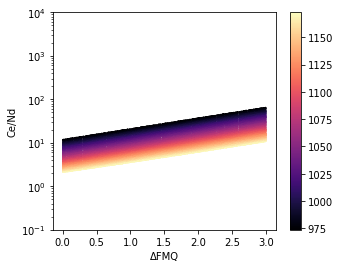

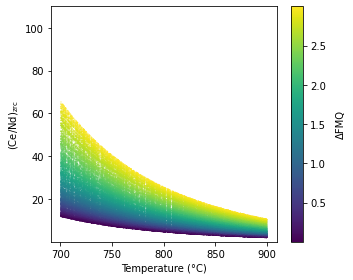

In [34]:
plt.scatter(all_model_results['delFMQ'], all_model_results['zircon Ce/Nd'], s = 0.05, c = all_model_results['T'], cmap = 'magma')
plt.yscale('log')
plt.ylim([0.1,10000])
plt.ylabel('Ce/Nd')
plt.xlabel('ΔFMQ')
cbar = plt.colorbar()
plt.show()

rcParams['figure.figsize'] = 5,4
plt.scatter(all_model_results['T']-273.15, all_model_results['zircon Ce/Nd'], s = 0.05, c = all_model_results['delFMQ'], cmap = "viridis")
plt.ylim([0.1,110])
plt.ylabel('$\mathregular{(Ce/Nd)_{zrc}}$')
plt.xlabel('Temperature (°C)')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('ΔFMQ', rotation=90)
plt.tight_layout()
plt.show()


Below shows a similar Monte Carlo simulation where the effect of melt Ce/Nd is evaluated by fixing all other parameters and allow melt Ce/Nd to vary between 2 and 5.

In [37]:
# The first simulation block is for FMQ+2

# Set ranges for parameters and generate random distributions for parameters
#fO2
delFMQ_min, delFMQ_max, delFMQ_mean = 2, 2, 2
range_delFMQ = np.random.uniform(delFMQ_min, delFMQ_max, 1000)
#Temperature
T_min, T_max, T_mean = 700,900,800
T_min, T_max, T_mean = T_min + 273.15, T_max + 273.15, T_mean + 273.15
range_T = np.random.uniform(T_min, T_max, 1000)
#xH2O - empirical for now
xH2O_min, xH2O_max, xH2O_mean = 0.1866, 0.1866, 0.1866
xH2O_stdev = (xH2O_max-xH2O_min)/4
range_xH2O = np.random.uniform(xH2O_min, xH2O_max,1000)
# fixed DCe3+
DCe3 = 0.01
# melt Ce/Nd
meltCeNd_min, meltCeNd_max, meltCeNd_mean = 2, 5, 3.5
range_meltCeNd = np.random.uniform(meltCeNd_min, meltCeNd_max, 1000)
range_DNd = np.random.uniform(0.077, 0.077, 1000)

# Monte Carlo simulation

n = 100000
run = 0
fer_run = 0
bar_run = 0
all_results_zirconCeNd = []
all_results_zirconSm = []
all_results_delFMQ = []
all_results_T = []
all_results_NBOT = []
all_results_xH2O = []
all_results_Ce_valence_ratio = []
all_results_DCe4 = []
all_results_DCe = []
all_results_Ce_melts = []
all_results_Nd_melts = []
all_results_Sm_melts = []
all_results_meltCeNd = []
while run <= n:
    rd_T = rd.choice(range_T)
    rd_delFMQ = rd.choice(range_delFMQ)
    rd_NBOT = calc_NBOT(rd_T)
    rd_xH2O = rd.choice(range_xH2O)
    rd_meltCeNd = rd.choice(range_meltCeNd)
    rd_Ce_valence_ratio = calc_Ce_valence_ratio(rd_delFMQ, rd_T, rd_NBOT, rd_xH2O)
    rd_DCe4 = calc_DCe4(rd_T)
    rd_DCe = calc_DCe(rd_Ce_valence_ratio, rd_DCe4, DCe3)
    D_index = rd.randrange(len(range_DNd))
    rd_DNd = range_DNd[D_index]
    zircon_CeNd = (rd_DCe*rd_meltCeNd)/(rd_DNd*1)
    all_results_zirconCeNd.append(zircon_CeNd)
    all_results_Ce_valence_ratio.append(rd_Ce_valence_ratio)
    all_results_T.append(rd_T)
    all_results_delFMQ.append(rd_delFMQ)
    all_results_NBOT.append(rd_NBOT)
    all_results_xH2O.append(rd_xH2O)
    all_results_DCe.append(rd_DCe)
    all_results_DCe4.append(rd_DCe4)
    all_results_meltCeNd.append(rd_meltCeNd)
    run = run + 1 # Move onto the next simulation

FMQ2_all_model_results = pd.DataFrame({'delFMQ': all_results_delFMQ, 'Ce4+/3+':all_results_Ce_valence_ratio, 'T': all_results_T, 
                              'NBO/T':all_results_NBOT, 'xH2O':all_results_xH2O,'DCe4':all_results_DCe4,'DCe':all_results_DCe,
                              'melt Ce/Nd': all_results_meltCeNd, 'zircon Ce/Nd': all_results_zirconCeNd})    

# The second simulation block is for FMQ
# Set ranges for parameters and generate random normal distributions for parameters
#fO2
delFMQ_min, delFMQ_max, delFMQ_mean = 0, 0, 0
range_delFMQ = np.random.uniform(delFMQ_min, delFMQ_max, 1000)
#Temperature
T_min, T_max, T_mean = 700,900,800
T_min, T_max, T_mean = T_min + 273.15, T_max + 273.15, T_mean + 273.15
range_T = np.random.uniform(T_min, T_max, 1000)
#xH2O - empirical for now
xH2O_min, xH2O_max, xH2O_mean = 0.1866, 0.1866, 0.1866
xH2O_stdev = (xH2O_max-xH2O_min)/4
range_xH2O = np.random.normal(xH2O_mean, xH2O_stdev,1000)
# fixed DCe3+ for now
DCe3 = 0.0000001
# melt Ce/Nd
meltCeNd_min, meltCeNd_max, meltCeNd_mean = 2, 5, 3.5
range_meltCeNd = np.random.uniform(meltCeNd_min, meltCeNd_max,1000)
range_DNd = np.random.uniform(0.077, 0.077, 1000)

# Monte Carlo simulation

n = 100000
run = 0
fer_run = 0
bar_run = 0
all_results_zirconCeNd = []
all_results_zirconSm = []
all_results_delFMQ = []
all_results_T = []
all_results_NBOT = []
all_results_xH2O = []
all_results_Ce_valence_ratio = []
all_results_DCe4 = []
all_results_DCe = []
all_results_Ce_melts = []
all_results_Nd_melts = []
all_results_Sm_melts = []
all_results_meltCeNd = []
while run <= n:
    rd_T = rd.choice(range_T)
    rd_delFMQ = rd.choice(range_delFMQ)
    rd_NBOT = calc_NBOT(rd_T)
    rd_xH2O = rd.choice(range_xH2O)
    rd_meltCeNd = rd.choice(range_meltCeNd)
    rd_Ce_valence_ratio = calc_Ce_valence_ratio(rd_delFMQ, rd_T, rd_NBOT, rd_xH2O)
    rd_DCe4 = calc_DCe4(rd_T)
    rd_DCe = calc_DCe(rd_Ce_valence_ratio, rd_DCe4, DCe3)
    D_index = rd.randrange(len(range_DNd))
    rd_DNd = range_DNd[D_index]
    zircon_CeNd = (rd_DCe*rd_meltCeNd)/(rd_DNd*1)
    all_results_zirconCeNd.append(zircon_CeNd)
    all_results_Ce_valence_ratio.append(rd_Ce_valence_ratio)
    all_results_T.append(rd_T)
    all_results_delFMQ.append(rd_delFMQ)
    all_results_NBOT.append(rd_NBOT)
    all_results_xH2O.append(rd_xH2O)
    all_results_DCe.append(rd_DCe)
    all_results_DCe4.append(rd_DCe4)
    all_results_meltCeNd.append(rd_meltCeNd)
    run = run + 1 # Move onto the next simulation

FMQ0_all_model_results = pd.DataFrame({'delFMQ': all_results_delFMQ, 'Ce4+/3+':all_results_Ce_valence_ratio, 'T': all_results_T, 
                              'NBO/T':all_results_NBOT, 'xH2O':all_results_xH2O,'DCe4':all_results_DCe4,'DCe':all_results_DCe,
                              'melt Ce/Nd': all_results_meltCeNd, 'zircon Ce/Nd': all_results_zirconCeNd})    


Plot the results at FMQ and FMQ+2 on one plot to allow comparison.

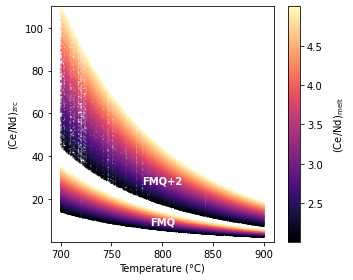

In [38]:
plt.scatter(FMQ2_all_model_results['T']-273.15, FMQ2_all_model_results['zircon Ce/Nd'], s = 0.05, c = FMQ2_all_model_results['melt Ce/Nd'], cmap = 'magma')
plt.scatter(FMQ0_all_model_results['T']-273.15, FMQ0_all_model_results['zircon Ce/Nd'], s = 0.05, c = FMQ0_all_model_results['melt Ce/Nd'], cmap = 'magma')
plt.annotate('FMQ+2', (800,27), c = 'white', fontweight='bold', ha = 'center')
plt.annotate('FMQ', (800,8), c = 'white', fontweight='bold', ha = 'center')
plt.ylim([0.1,110])
plt.ylabel('$\mathregular{(Ce/Nd)_{zrc}}$')
plt.xlabel('Temperature (°C)')
cbar = plt.colorbar()
cbar.ax.get_yaxis().labelpad = 10
cbar.ax.set_ylabel('$\mathregular{(Ce/Nd)_{melt}}$', rotation=90)
plt.tight_layout()
plt.show()

